## Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, on="Mouse ID", how='left')

# Display the data 
(combined_data.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [69]:
# Checking the number of mice.
total_mice = combined_data['Mouse ID'].nunique()

# Display the total number of mice
total_mice



249

In [70]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get an array of duplicate Mouse IDs
duplicate_ids = duplicate_mice['Mouse ID'].unique()

# Display the array of duplicate Mouse IDs
(duplicate_ids)

array(['g989'], dtype=object)

In [71]:
# Optional: Get all the data for the duplicate mouse ID. 
# Specify the duplicate mouse ID
duplicate_mouse_id = 'g989'

# Filter the combined data for the duplicate mouse ID
duplicate_data = combined_data[combined_data['Mouse ID'] == duplicate_mouse_id]

# Display the duplicate data
(duplicate_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_ids)==False]

# Display the clean data
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [73]:
# Calculate the total number of mice in the clean dataset
total_mice = len(clean_data['Mouse ID'].unique())

# Display the total number of mice
(total_mice)


248

## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [75]:
# Group the data by the 'Drug Regimen' column
grouped_data = clean_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and sem of the tumor volume
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

# Display the summary statistics table
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [76]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [77]:
# Group the data by the 'Drug Regimen' column
grouped_data = clean_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary statistics table
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

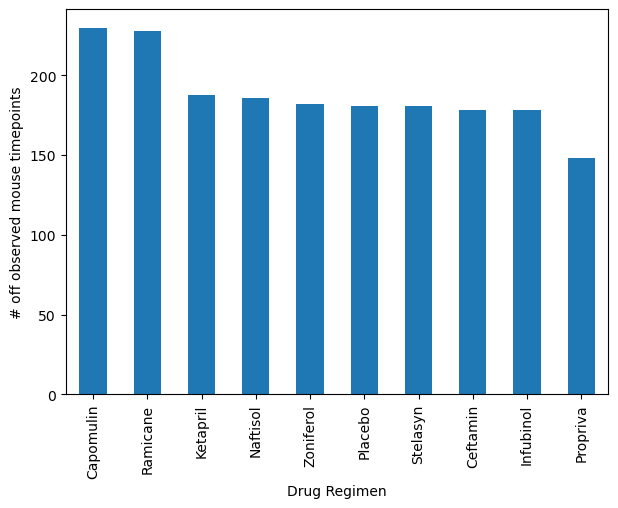

In [79]:
# Group the data by 'Drug Regimen'
count_by_regimen = clean_data.groupby('Drug Regimen').size()

# Sort the count values in ascending order
count_by_regimen = count_by_regimen.sort_values(ascending=False)

# Create a bar plot using Pandas
count_by_regimen.plot(kind='bar', figsize=(7, 5))

# Set the plot axes labels
plt.xlabel('Drug Regimen')
plt.ylabel('# off observed mouse timepoints')

# Display the plot
plt.show()


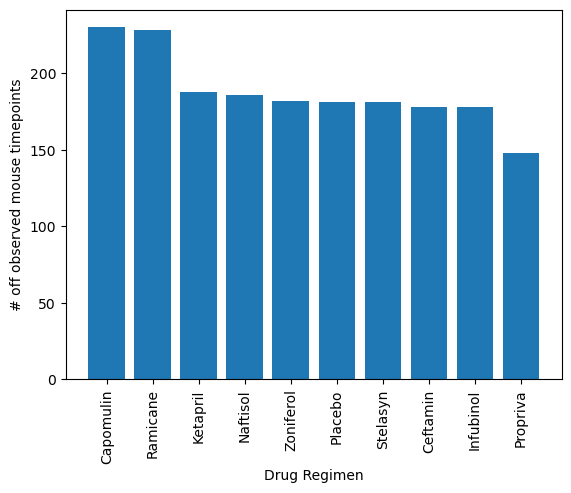

In [80]:
import matplotlib.pyplot as plt

# Get the drug regimens and row counts
regimens = count_by_regimen.index
row_counts = count_by_regimen.values

# Generate the bar plot
plt.bar(regimens, row_counts)

# Set the plot axes labels
plt.xlabel('Drug Regimen')
plt.ylabel('# off observed mouse timepoints')
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

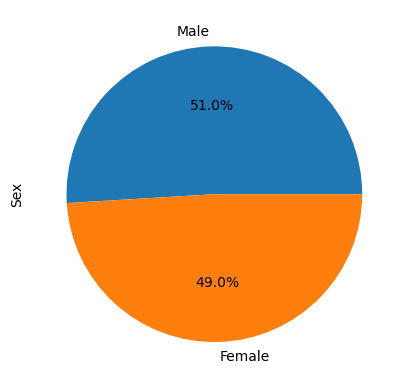

In [82]:
# Group the DataFrame by 'Sex' and count the occurrences
plot_sex = clean_data['Sex'].value_counts()

# Create the pie plot using Pandas
plot_sex.plot(kind='pie', autopct="%1.1f%%", startangle=360)

# Display the pie plot
plt.show()


In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

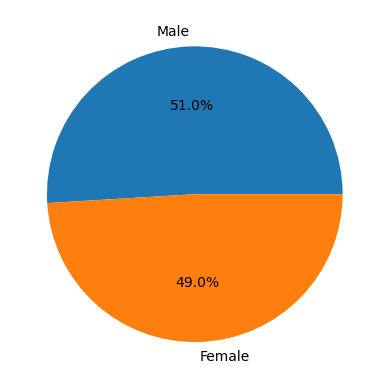

In [84]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Sex' and count the occurrences
plot_sex = clean_data['Sex'].value_counts()

# Create the pie plot using pyplot
plt.pie(plot_sex, labels=plot_sex.index, autopct="%1.1f%%", startangle=360)

# Display the pie plot
plt.show()


## Quartiles, Outliers and Boxplots

In [87]:
# List of the treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse in treatment regimens
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last_timepoint DataFrame with the clean DataFrame
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')


In [88]:
# Put treatments into a list
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor vol data
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset of tumor volumes to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR (interquartile range)
    quartiles = tumor_volumes.quantile([0.25, 0.50, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Check for potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers:")
    print(outliers)
    print()


Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



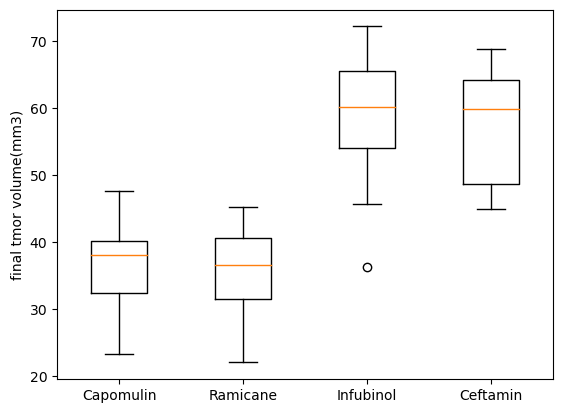

In [89]:

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.import matplotlib.pyplot as plt

# List of treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list for tumor volume data
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_vol_data.append(treatment_data)

# Create a box plot
plt.boxplot(tumor_vol_data, labels=treatments)

# Add labels and title
plt.ylabel('final tmor volume(mm3)')

# Display the plot
plt.show()


## Line and Scatter Plots

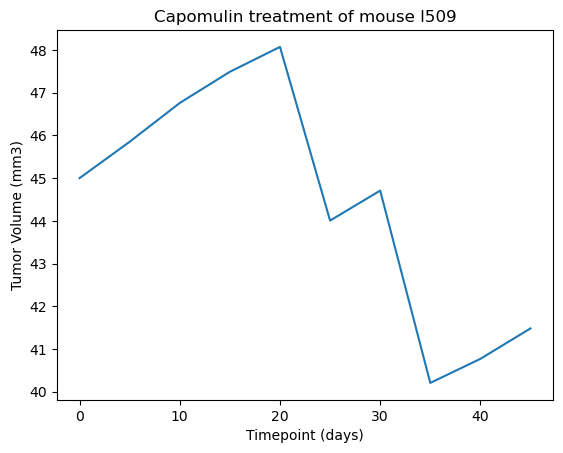

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select mouse treated with Capomulin
mouse_id = 'l509'
capomulin_data = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]

# Generate the line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

# Display the plot
plt.show()

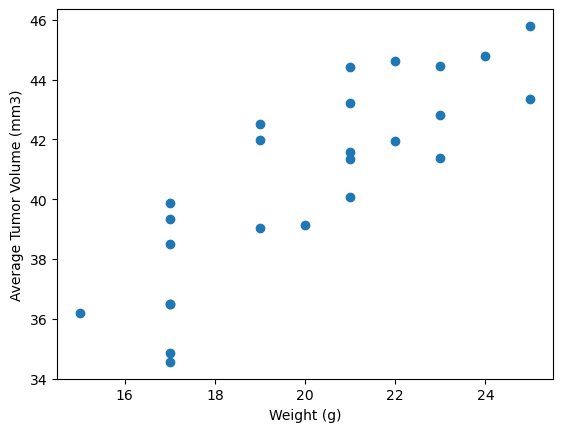

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter the data for Capomulin regimen
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


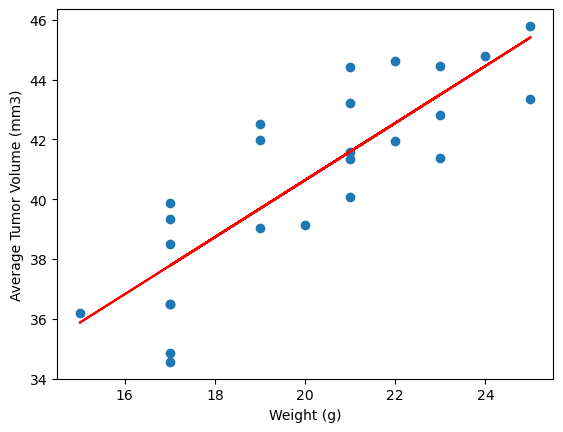

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimenimport matplotlib.pyplot as plt


import scipy.stats as stats

# Calculate the correlation coefficient
correlation_coefficient = stats.pearsonr(mouse_weight, average_tumor_volume)[0]

# Create the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weight, average_tumor_volume)

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)

# Create the linear regression line
regression_line = slope * mouse_weight + intercept

# Plot the linear regression line
plt.plot(mouse_weight, regression_line, color='red')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Print the heading with the correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

# Show the plot
plt.show()
